# Matrix eQTL

In [1]:
library("MatrixEQTL");

In [2]:
base.dir = '/data_volume/memento/lupus/mateqtl_input/'

In [3]:
useModel = modelLINEAR; # modelANOVA, modelLINEAR, or modelLINEAR_CROSS

# Genotype file name
SNP_file_name = paste(base.dir, "cm_cg.genos", sep="");

# Gene expression file name
expression_file_name = paste(base.dir, "cm_cg.expr", sep="");

# Covariates file name
# Set to character() for no covariates
covariates_file_name = paste(base.dir, "cm_cg.mateqtl_cov.txt", sep="");

# Output file name
output_file_name_cis = paste(base.dir, "cm_cg_matqtl_cis.out", sep="");
output_file_name_tra = paste(base.dir, "cm_cg_matqtl_trans.out", sep="");

# Only associations significant at this level will be saved
pvOutputThreshold_cis = 5e-2;
pvOutputThreshold_tra = 0;


# Error covariance matrix
# Set to numeric() for identity.
errorCovariance = numeric();

In [4]:
## Load genotype data

snps = SlicedData$new();
snps$fileDelimiter = "\t";      # the TAB character
snps$fileOmitCharacters = "NA"; # denote missing values;
snps$fileSkipRows = 1;          # one row of column labels
snps$fileSkipColumns = 1;       # one column of row labels
snps$fileSliceSize = 100000;      # read file in slices of 2,000 rows
snps$LoadFile(SNP_file_name);

## Load gene expression data

gene = SlicedData$new();
gene$fileDelimiter = "\t";      # the TAB character
gene$fileOmitCharacters = "NA"; # denote missing values;
gene$fileSkipRows = 1;          # one row of column labels
gene$fileSkipColumns = 1;       # one column of row labels
gene$fileSliceSize = 2000;      # read file in slices of 2,000 rows
gene$LoadFile(expression_file_name);

## Load covariates

cvrt = SlicedData$new();
cvrt$fileDelimiter = "\t";      # the TAB character
cvrt$fileOmitCharacters = "NA"; # denote missing values;
cvrt$fileSkipRows = 1;          # one row of column labels
cvrt$fileSkipColumns = 1;       # one column of row labels
if(length(covariates_file_name)>0) {
cvrt$LoadFile(covariates_file_name);
}

Rows read: 100,000

Rows read: 200,000

Rows read: 300,000

Rows read: 400,000

Rows read: 500,000

Rows read: 600,000

Rows read: 700,000

Rows read: 800,000

Rows read: 900,000

Rows read: 1,000,000

Rows read: 1,100,000

Rows read: 1,200,000

Rows read: 1,300,000

Rows read: 1,400,000

Rows read: 1,500,000

Rows read: 1,600,000

Rows read: 1,700,000

Rows read: 1,800,000

Rows read: 1,900,000

Rows read: 2,000,000

Rows read: 2,100,000

Rows read: 2,200,000

Rows read: 2,300,000

Rows read: 2,400,000

Rows read: 2,500,000

Rows read: 2,600,000

Rows read: 2,700,000

Rows read: 2,800,000

Rows read: 2,900,000

Rows read: 3,000,000

Rows read: 3,100,000

Rows read: 3,200,000

Rows read: 3,300,000

Rows read: 3,400,000

Rows read: 3,500,000

Rows read: 3,600,000

Rows read: 3,700,000

Rows read: 3,800,000

Rows read: 3,900,000

Rows read: 4,000,000

Rows read: 4078216 done.

Rows read: 2,000

Rows read: 4,000

Rows read: 6,000

Rows read: 8,000

Rows read: 10,000

Rows read: 10525 done

In [5]:
snps_location_file_name = paste(base.dir, "cm_cg.snpspos.txt", sep="");
gene_location_file_name = paste(base.dir, "../geneloc.txt", sep="");

In [6]:
cisDist = 1e5;


In [7]:
snpspos = read.table(snps_location_file_name, header = TRUE, stringsAsFactors = FALSE);


In [8]:
genepos = read.table(gene_location_file_name, header = TRUE, stringsAsFactors = FALSE, sep=",");

In [9]:
me = Matrix_eQTL_main(
    snps = snps,
    gene = gene,
#     cvrt = cvrt,
    output_file_name     = output_file_name_tra,
    pvOutputThreshold     = pvOutputThreshold_tra,
    useModel = useModel,
    errorCovariance = errorCovariance,
    verbose = TRUE,
    output_file_name.cis = output_file_name_cis,
    pvOutputThreshold.cis = pvOutputThreshold_cis,
    snpspos = snpspos,
    genepos = genepos,
    cisDist = cisDist,
    pvalue.hist = "qqplot",
    min.pv.by.genesnp = FALSE,
    noFDRsaveMemory = FALSE);

Matching data files and location files

9585 of 10525 genes matched

4078216 of 4078216 SNPs matched


Task finished in 4.799 seconds

Reordering genes

Task finished in 1.826 seconds

Processing covariates

Task finished in 0.004 seconds

Processing gene expression data (imputation, residualization)

Task finished in 0.076 seconds

Creating output file(s)

Task finished in 0.057 seconds

Performing eQTL analysis

 0.40% done, 7,622 cis-eQTLs

 2.84% done, 14,970 cis-eQTLs

 5.28% done, 19,321 cis-eQTLs

 7.72% done, 22,626 cis-eQTLs

10.16% done, 26,300 cis-eQTLs

12.60% done, 29,677 cis-eQTLs

15.04% done, 32,927 cis-eQTLs

17.47% done, 38,713 cis-eQTLs

19.91% done, 40,924 cis-eQTLs

20.32% done, 42,882 cis-eQTLs

22.76% done, 46,138 cis-eQTLs

25.20% done, 49,455 cis-eQTLs

27.64% done, 51,266 cis-eQTLs

30.08% done, 52,595 cis-eQTLs

32.52% done, 55,905 cis-eQTLs

34.95% done, 60,189 cis-eQTLs

37.39% done, 75,712 cis-eQTLs

39.83% done, 77,794 cis-eQTLs

42.27% done, 82,034 cis-e

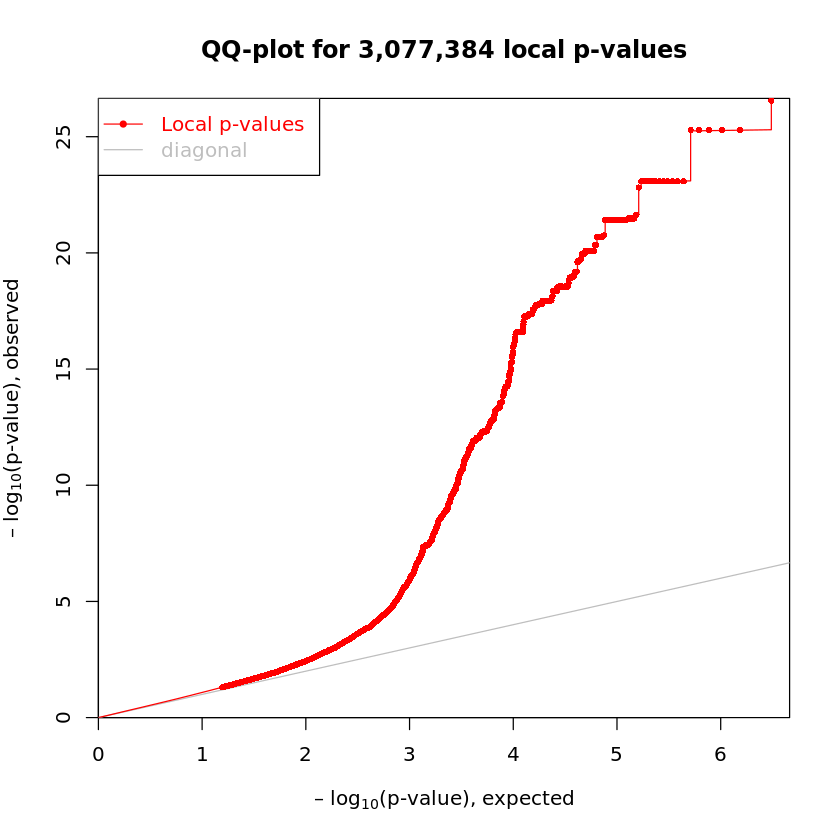

In [17]:
plot(me, pch = 16, cex = 0.7)